* Student Name - Aakash Jain.
* Roll No. - 222010019.
* Subject - Data Mining Laboratory
* Lab Experiment No. 2 - EDA analysis of data for the given dataset.
1. Find the shape of the datafile.
2. Display the first 5 and last 5 records.
3. List the column headers.
4. Give average duration for the data based on type.
5. List all the movies directed by a particular director in chronological order.
6. Give appropriate visualization for various type year wise.
7. Give appropriate visualization for the following queries.
    a. Most of TV shows listed in kids spans atleast 2 seasons.
    b. Most of the movies that are filmed fall in the category of action and adventure.
    c. In a given year how many movies of a particular type are released?
    d. Give sentimental analysis of an actor and various types of movies he acted during his life.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('datasets/netflix_titles.csv')

**1. Find the shape of the datafile.**

In [7]:
df.shape

(8807, 12)

**2. Display the first 5 and last 5 records.**

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


**3. List the column headers.**

In [53]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**4. Give average duration for the data based on type.**

In [54]:
df['duration'] = df['duration'].apply(lambda x: x if isinstance(x, float) else x.split(' ')[0])

In [55]:
movie_duration = df.loc[df['type'] == 'Movie', 'duration'].dropna().astype(int).mean().round(2)
print("A movie runs {} minutes on average.".format("%.2f" % movie_duration))

A movie runs 99.58 minutes on average.


In [56]:
series_duration = df.loc[df['type'] == 'TV Show', 'duration'].dropna().astype(int).mean().round(2)
print('A series runs {} seasons on average.'.format("%.2f" % series_duration))

A series runs 1.76 seasons on average.


**5. List all the movies directed by a particular director in chronological order.**

In [1]:
director = input()
df.loc[df['director'] == director, ['title', 'director', 'release_year']].sort_values('release_year')

Christopher Nolan


NameError: name 'df' is not defined

**6. Give appropriate visualization for various type year wise.**

In [13]:
release_count = df['release_year'].value_counts().to_dict()
movies_count, series_count = [], []
for year in release_count.keys():
    movies_count.append(df.loc[(df['release_year'] == year) & (df['type'] == 'Movie'), 'title'].count())
    series_count.append(df.loc[(df['release_year'] == year) & (df['type'] == 'TV Show'), 'title'].count())
release_type_df = pd.DataFrame({'years':release_count.keys(), 'movie_count':movies_count, 'series_count':series_count}).sort_values(by = 'years')

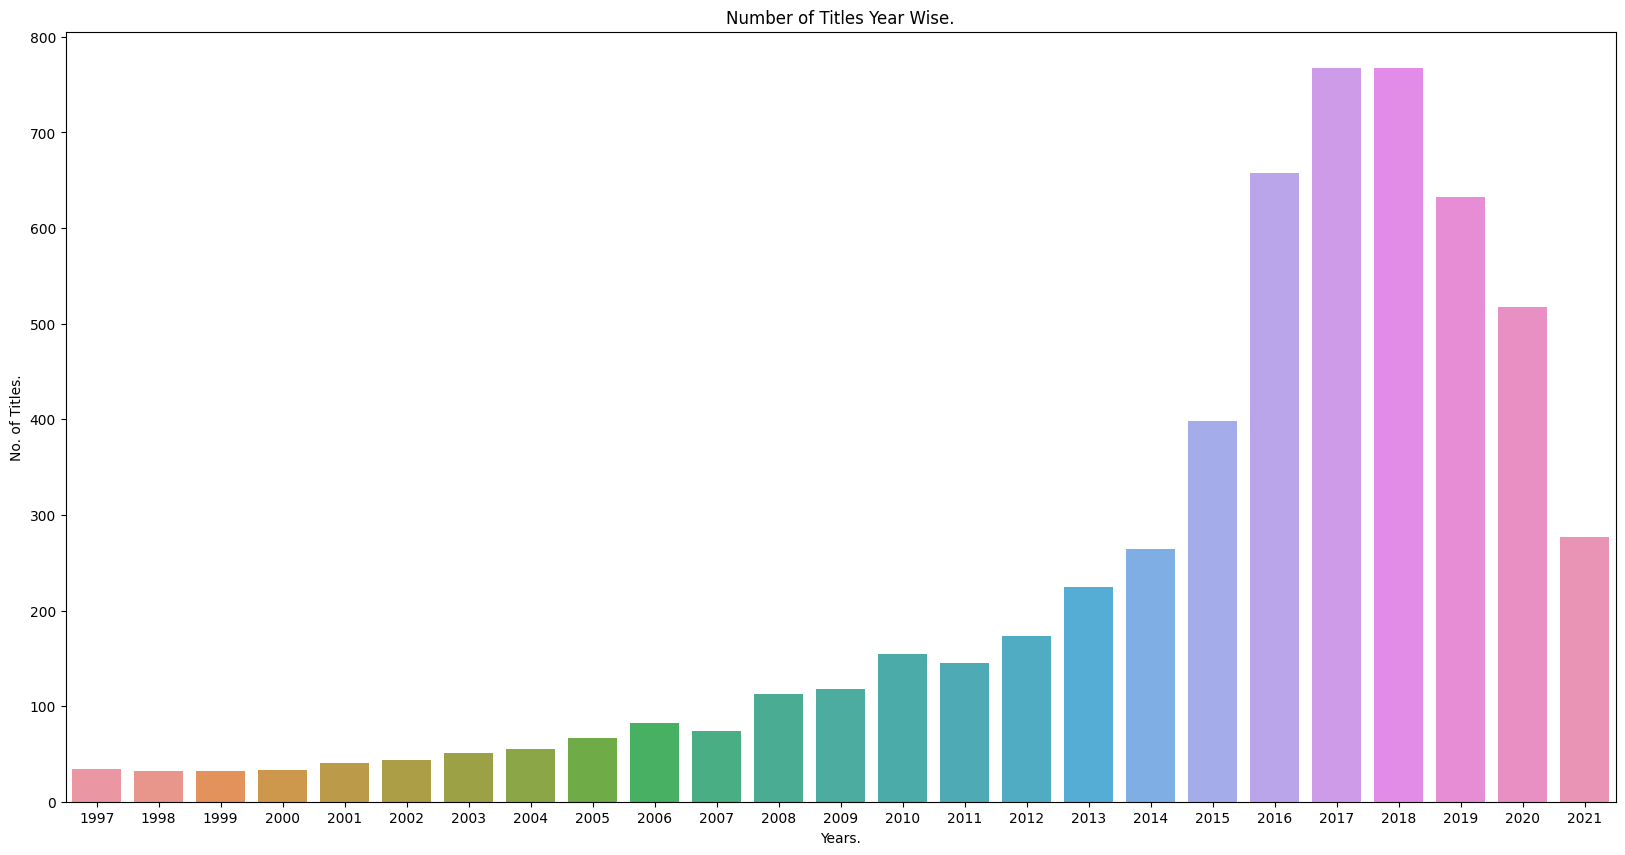

In [18]:
# plt.subplots(figsize=(20, 10))
plt.figure(figsize=(20, 10))
sns.barplot(data = release_type_df.tail(25),
            x = 'years',
            y  = 'movie_count')
plt.xlabel('Years.')
plt.ylabel('No. of Titles.')
plt.title('Number of Titles Year Wise.')
plt.show()

7. Give appropriate visualization for the following queries. 
a. Most of TV shows listed in kids spans at least 2 seasons.

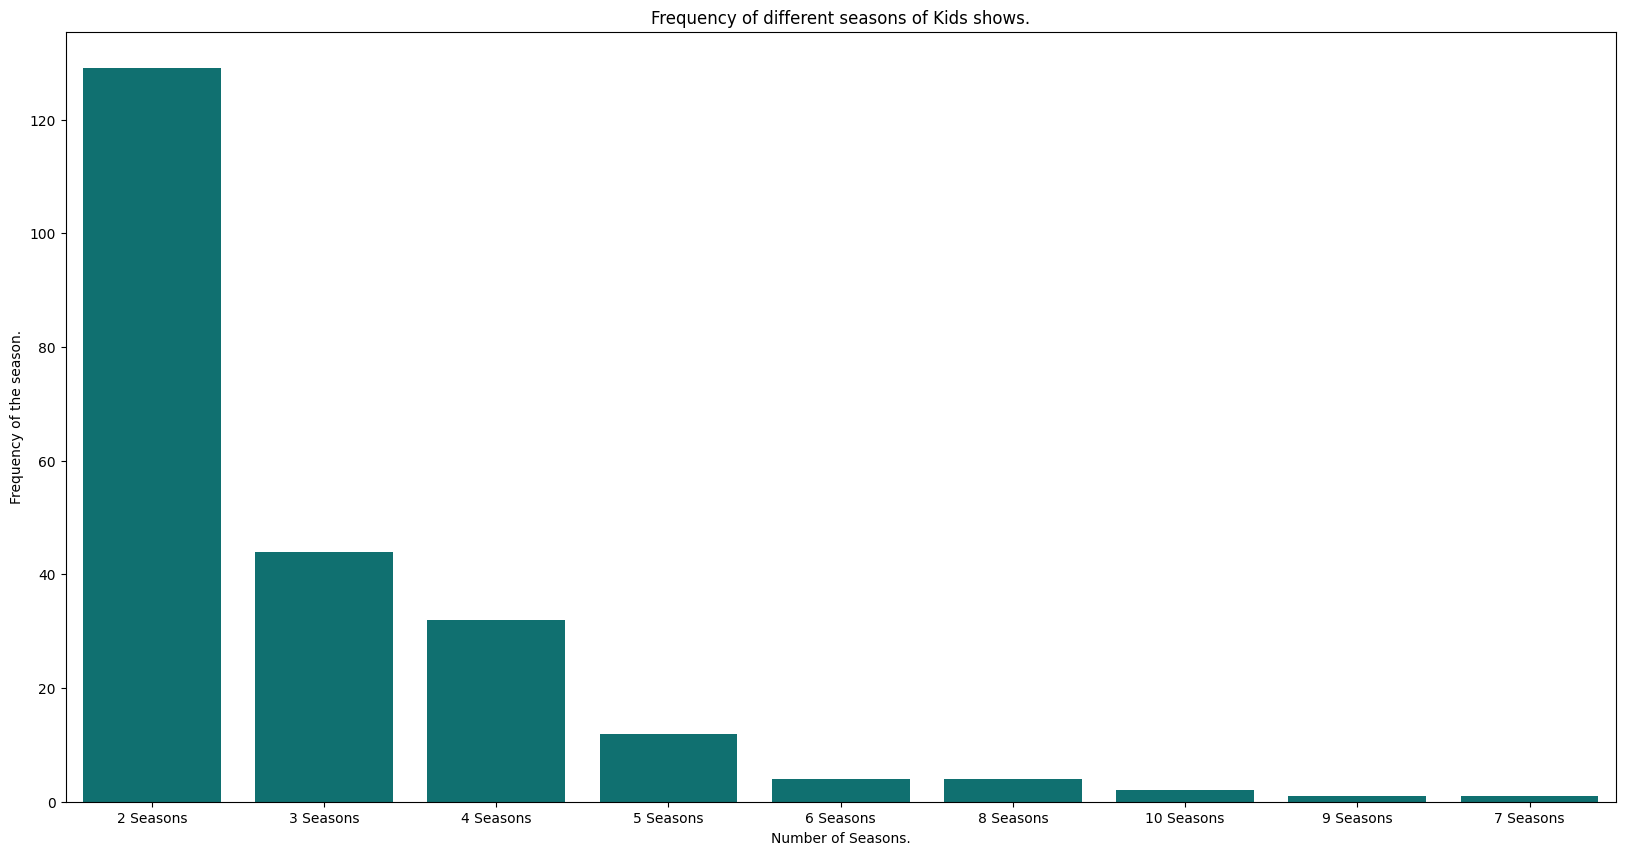

In [32]:
counts = df.loc[df["listed_in"].str.contains("Kids' TV"), "duration"].value_counts().to_dict()

_, fig = plt.subplots(figsize=(20, 10))
sns.barplot(x = list(counts.keys())[1:], 
            y = list(counts.values())[1:],
            color = 'teal')
plt.xlabel("Number of Seasons.")
plt.ylabel("Frequency of the season.")
plt.title("Frequency of different seasons of Kids shows.")
plt.show()

b. Most of the movies that are filmed fall in the category of action and adventure.

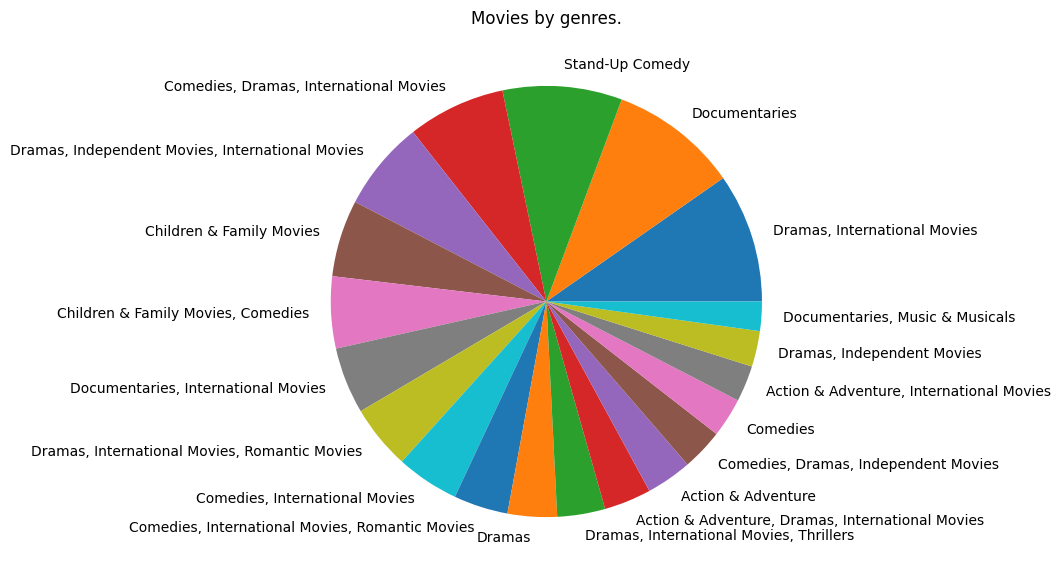

In [11]:
movie_genres = df.loc[df["type"] == "Movie"]["listed_in"].value_counts().head(20).to_dict()

fig = plt.figure(figsize = (10, 7))
plt.pie(movie_genres.values(), labels = movie_genres.keys())
plt.title("Movies by genres.")
plt.show()

c. In a given year how many movies of a particular type are released?

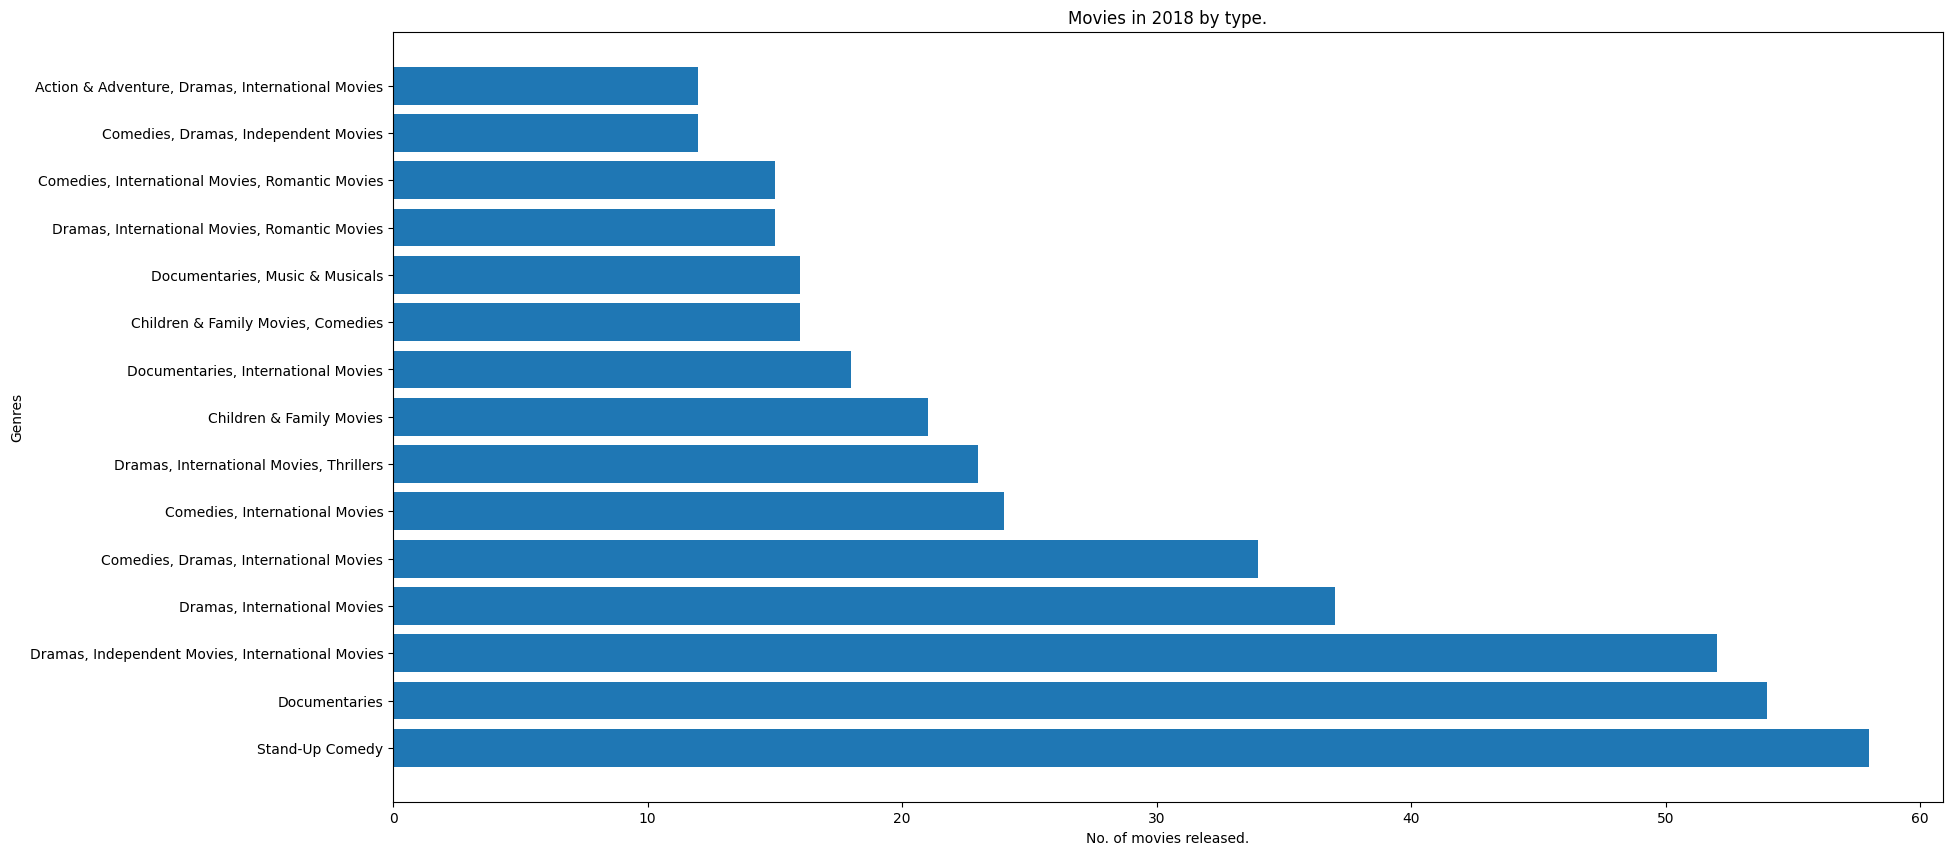

In [120]:
year = 2018
mov_type = df.loc[(df['type'] == "Movie") & (df["release_year"] == year)]["listed_in"].value_counts().head(15).to_dict()

plt.figure(figsize=(20,10))
plt.ylabel("Genres")
plt.xlabel("No. of movies released.")
plt.title(f"Movies in {year} by type.")
plt.barh(list(mov_type.keys()), list(mov_type.values()))
plt.show()

 d. Give sentimental analysis of an actor and various types of movies he acted during his life.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [ ]:
df['description'] = df['description'].astype(str).str.lower()

In [ ]:
regexp = RegexpTokenizer('\w+')
df['description'] = df['description'].apply(regexp.tokenize)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
df['description_token'] = df['description'].apply(lambda x: [item for item in x if item not in stopwords and len(item) > 2])

In [ ]:
df['description_string'] = df['description_token'].apply(lambda x: ' '.join(x))

In [ ]:
actors = {}

for i, j in df['cast'].dropna().items():
  for actor in j.split(','):
    if actor in actors:
      actors[actor].append(df['listed_in'].loc[i])
    else:
      actors[actor] = [df['lbisted_in'].loc[i]]

pd.DataFrame(actors.items(), columns=['Actor', 'Movie_type']).head(15)